In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
loc = "H:/PGA10_Python/part-3"

In [3]:
df = pd.read_csv(loc+"/HousePrice.csv")

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
df1 = df.drop(['ID'], axis=1)
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
df1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


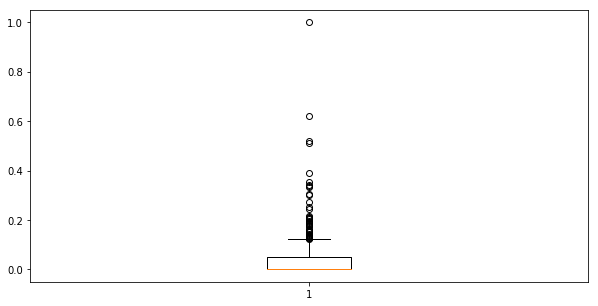

In [410]:
plt.boxplot(df1['crim']); plt.show(); #proof of outlier

In [422]:
from scipy import stats
z = stats.zscore(df1); #with negative values
z_abs = np.abs(z); #direction doesn't matter. so take absolute.
dfz = df1[(z_abs<3).all(axis=1)]
print(df1.shape)
print(dfz.shape)

(333, 14)
(268, 14)


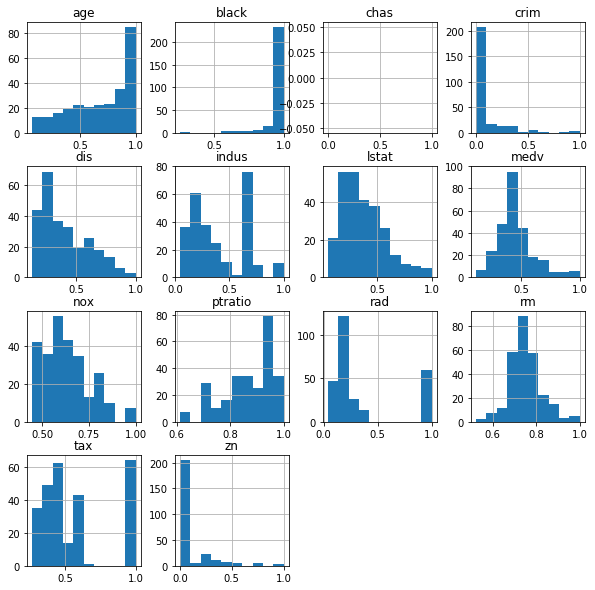

In [423]:
df1 = dfz
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
df1 = df1/df1.max(); #max normalization
df1.hist(); plt.show()

In [424]:
from scipy.stats import skew
print(df1.shape)
df_skew = np.abs(skew(df1))
df_skew

(268, 14)


array([2.7509477 , 2.34559363, 0.44818072,        nan, 0.85677683,
       0.6143054 , 0.61045471, 0.8057689 , 1.21645628, 0.78216679,
       0.79988721, 4.10168458, 0.84542379, 1.15624929])

In [425]:
skewed_cols=[]
for i in range(len(df1.columns)):
    if df_skew[i]>0.7:
        skewed_cols.append(df1.columns[i])
skewed_df = df1[skewed_cols]
print(skewed_df.shape)
not_skewed_df = df1.drop(skewed_cols, axis=1)
print(not_skewed_df.shape)

(268, 10)
(268, 4)


In [426]:
rcParams['figure.figsize'] = 10, 10
import warnings
warnings.filterwarnings("ignore")
df_log_skewed = np.log1p(skewed_df)
df2 = pd.concat([df_log_skewed, not_skewed_df], axis=1); print(df2.shape)
# df2.hist(); plt.show()

(268, 14)


In [441]:
x = df2.drop(['medv','chas'], axis=1)
y = df2['medv']

print(x.shape, y.shape)

(268, 12) (268,)


In [428]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [429]:
model = linear_model.LinearRegression()

In [430]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=123)
print(xtrain.shape, xtest.shape)

(214, 12) (54, 12)


In [448]:
# model.fit(xtrain,ytrain)
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [449]:
w = model.coef_
w

array([-0.14681573,  0.03823667, -0.23985983, -0.26029536,  0.18016939,
       -0.18913427, -0.39552243,  0.03499737, -0.37843066,  0.0208439 ,
        0.41601339, -0.02778263])

In [450]:
w_map={}
cols = x.columns
for i in range(len(cols)):
#     print(i)
    w_map[cols[i]] = w[i]
w_map

{'crim': -0.1468157279999233,
 'zn': 0.038236668528935876,
 'nox': -0.239859832476128,
 'dis': -0.2602953646839703,
 'rad': 0.18016938835404228,
 'tax': -0.18913427118179102,
 'ptratio': -0.39552242757456224,
 'black': 0.03499736670768667,
 'lstat': -0.3784306598329621,
 'indus': 0.020843901458509204,
 'rm': 0.41601339350056676,
 'age': -0.027782634652948324}

In [451]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [452]:
train_err = mean_squared_error(ytrain, ypred_train)
train_acc = 1 - (train_err/ytrain.mean())
print(round(train_err,2), round(train_acc,2))

0.0 0.99


In [453]:
test_err = mean_squared_error(ytest, ypred_test)
test_acc = 1 - (test_err/ytest.mean())
print(round(test_err,2), round(test_acc,2))

0.0 1.0


In [454]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

crim


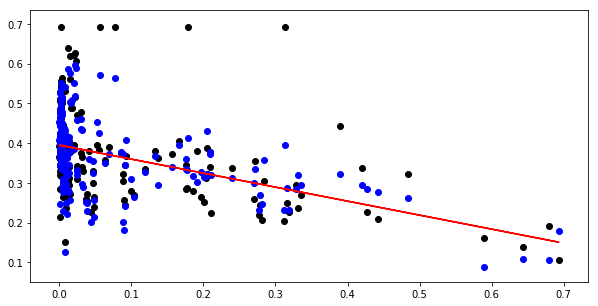

In [455]:
rcParams["figure.figsize"]= 10,5
i=0
print(cols[i])
filtered_data = xtrain.iloc[:,i]
plt.scatter(filtered_data, ytrain,  color='black')
plt.scatter(filtered_data, ypred_train, color='blue')
a, b = best_fit(filtered_data, ypred_train)
yfit = [a + b * xi for xi in filtered_data]
plt.plot(filtered_data, yfit, color='red')
plt.show()

In [456]:
import random
from statistics import mean
s=len(x); i=0; acc=[]
while i<s:
    n = random.choice([r for r in range(len(x))])
    i=i+1
#     print(n)
    actual_price = y.tolist()[n]
#     print("Actual price:", actual_price)
    xdata = np.array(x.iloc[n, :]).reshape(1,-1)
    predicted_price = model.predict(xdata)
#     predicted_price = predicted_price*max(df1['medv'])
#     print("predicted price:", predicted_price)
    accuracy = 1 - (abs(actual_price-predicted_price)/actual_price)
    acc.append(accuracy[0])
#     print("accuracy: ", accuracy)
print("")
print(mean(acc))


0.9056870526408309


In [457]:
pred_price = model.predict(x)
accuracy = 1 - (np.abs(y-pred_price)/y)
mean(accuracy)

0.8952599785864219